In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


C:\Users\lenovo\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# DATASET-1

In [2]:

df1 = pd.read_csv('EV Stats-1.csv')
df1.head()

,Sl. No,State,Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules,Two Wheelers (Category L2 (CMVR)),Two Wheelers (Max power not exceeding 250 Watts),Three Wheelers (Category L5 slow speed as per CMVR),Three Wheelers (Category L5 as per CMVR),Passenger Cars (Category M1 as per CMVR),Buses,Total in state
0,1,Andhra Pradesh,431,692,4689,0,0,3680,0,9492
1,2,Assam,463,138,1006,0,117,151,0,1875
2,3,Bihar,252,430,2148,6,64,271,0,3171
3,4,Chhattisgarh,613,382,2078,58,106,997,0,4234
4,5,Delhi,1395,251,5018,0,1,12695,21,19381


# DATASET-2

In [3]:

df2 = pd.read_csv('ElectricCarData_Norm.csv')
df2.head()

,Brand,Model,Accel_sec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Rapid charging possible,All Wheel Drive,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Rapid charging possible,All Wheel Drive,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Hatchback,B,4,32997


In [4]:
df2.shape

(103, 14)

In [5]:
df2.RapidCharge.value_counts()

Rapid charging possible        98
Rapid charging not possible     5
Name: RapidCharge, dtype: int64

In [6]:
df2.PowerTrain.value_counts()

All Wheel Drive      41
Front Wheel Drive    37
Rear Wheel Drive     25
Name: PowerTrain, dtype: int64

In [7]:
df2.RapidCharge.value_counts()

Rapid charging possible        98
Rapid charging not possible     5
Name: RapidCharge, dtype: int64

In [8]:
df2.PlugType.value_counts()

Type 2 CCS        90
Type 2             9
Type 2 CHAdeMO     3
Type 1 CHAdeMO     1
Name: PlugType, dtype: int64

In [9]:
df2.BodyStyle.value_counts()

SUV          45
Hatchback    32
Sedan        10
Liftback      5
Pickup        3
Cabrio        3
SPV           3
MPV           1
Station       1
Name: BodyStyle, dtype: int64

In [10]:
# checking the shape (# of rows and columns) of the datasets
print('DF1 Shape: ', df1.shape)
print('DF2 Shape: ', df2.shape)


DF1 Shape:  (31, 10)
DF2 Shape:  (103, 14)


In [11]:
# checking the info (columns, datatypes, nulls) of the datasets
print(' <<< DATASET 1 -----------------------------------------------------------')
print(df1.info())
print(' <<< DATASET 2 -----------------------------------------------------------')
print(df2.info())

 <<< DATASET 1 -----------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 10 columns):
 #   Column                                                              Non-Null Count  Dtype 
---  ------                                                              --------------  ----- 
 0   Sl. No                                                              31 non-null     int64 
 1   State                                                               31 non-null     object
 2   Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules  31 non-null     int64 
 3   Two Wheelers (Category L2 (CMVR))                                   31 non-null     int64 
 4   Two Wheelers (Max power not exceeding 250 Watts)                    31 non-null     int64 
 5   Three Wheelers (Category L5 slow speed as per CMVR)                 31 non-null     int64 
 6   Three Wheelers (Category L5 as per CMVR)         

In [12]:
# getting a statistical summary of the datasets
d1 = df1.describe()
display('<<< DATASET 1 >>>', d1)

'<<< DATASET 1 >>>'

,Sl. No,Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules,Two Wheelers (Category L2 (CMVR)),Two Wheelers (Max power not exceeding 250 Watts),Three Wheelers (Category L5 slow speed as per CMVR),Three Wheelers (Category L5 as per CMVR),Passenger Cars (Category M1 as per CMVR),Buses,Total in state
count,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
mean,16.000000,1777.354839,907.677419,7260.516129,25.096774,46.451613,6811.032258,1.741935,16829.870968
std,9.092121,5000.160994,2518.917378,20008.445495,73.990700,131.491150,18941.726543,6.016465,46327.212405
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,6.000000
25%,8.500000,22.000000,19.000000,94.000000,0.000000,0.000000,236.500000,0.000000,665.000000
50%,16.000000,463.000000,228.000000,2148.000000,0.000000,1.000000,997.000000,0.000000,4234.000000
75%,23.500000,1089.500000,767.500000,6639.000000,7.000000,37.500000,5487.500000,0.000000,14951.500000
max,31.000000,27549.000000,14069.000000,112538.000000,389.000000,720.000000,105571.000000,27.000000,260863.000000


In [13]:
d2 = df2.describe()
display('<<< DATASET 2 >>>', d2)

'<<< DATASET 2 >>>'

,Accel_sec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,Seats,PriceEuro
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000
mean,7.396117,179.194175,338.786408,189.165049,4.883495,55811.563107
std,3.017430,43.573030,126.014444,29.566839,0.795834,34134.665280
min,2.100000,123.000000,95.000000,104.000000,2.000000,20129.000000
25%,5.100000,150.000000,250.000000,168.000000,5.000000,34429.500000
50%,7.300000,160.000000,340.000000,180.000000,5.000000,45000.000000
75%,9.000000,200.000000,400.000000,203.000000,5.000000,65000.000000
max,22.400000,410.000000,970.000000,273.000000,7.000000,215000.000000


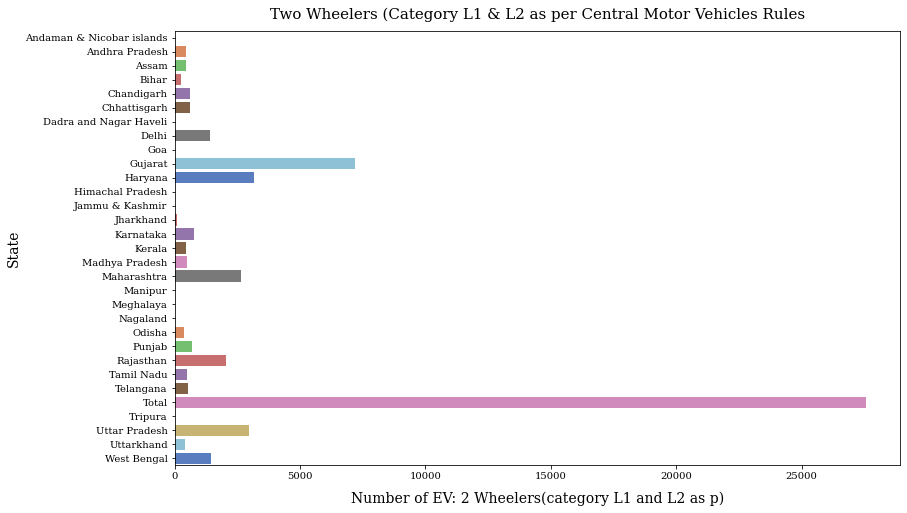

In [14]:
plt.figure(figsize=(13, 8))
sns.barplot(data=df1, y=df1['State'].sort_values(ascending=True), x='Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules', palette='muted')  # Change the palette color here
plt.ylabel('State', fontsize=14, family='serif')
plt.xlabel('Number of EV: 2 Wheelers(category L1 and L2 as p)', family='serif', fontsize=14, labelpad=10)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title(label='Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules', weight=200, family='serif', size=15, pad=12)
plt.show()

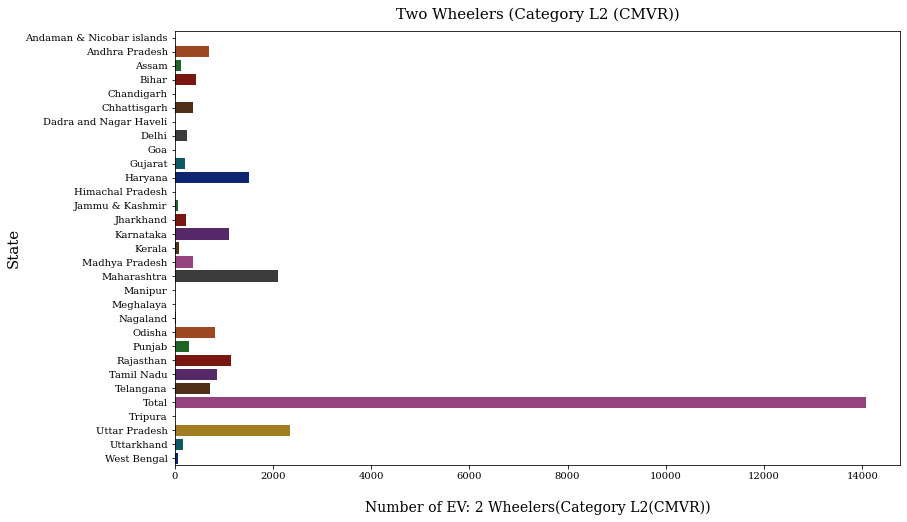

In [15]:
plt.figure(figsize=(13, 8))
sns.barplot(data=df1, y=df1['State'].sort_values(ascending=True), x='Two Wheelers (Category L2 (CMVR))', palette='dark')  
plt.ylabel('State', fontsize=15, family='serif')
plt.xlabel('Number of EV: 2 Wheelers(Category L2(CMVR))', family='serif', fontsize=14, labelpad=19)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title(label='Two Wheelers (Category L2 (CMVR))', weight=200, family='serif', size=15, pad=12)
plt.show()


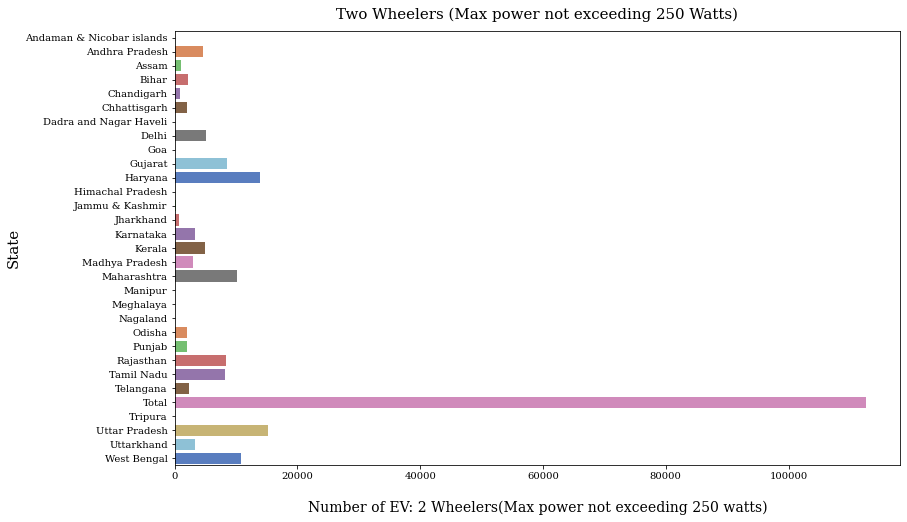

In [16]:
plt.figure(figsize=(13, 8))
sns.barplot(data=df1, y=df1['State'].sort_values(ascending=True), x='Two Wheelers (Max power not exceeding 250 Watts)', palette='muted')  # Change the palette color here
plt.ylabel('State', fontsize=15, family='serif')
plt.xlabel('Number of EV: 2 Wheelers(Max power not exceeding 250 watts)', family='serif', fontsize=14, labelpad=19)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title(label='Two Wheelers (Max power not exceeding 250 Watts)', weight=200, family='serif', size=15, pad=12)
plt.show()

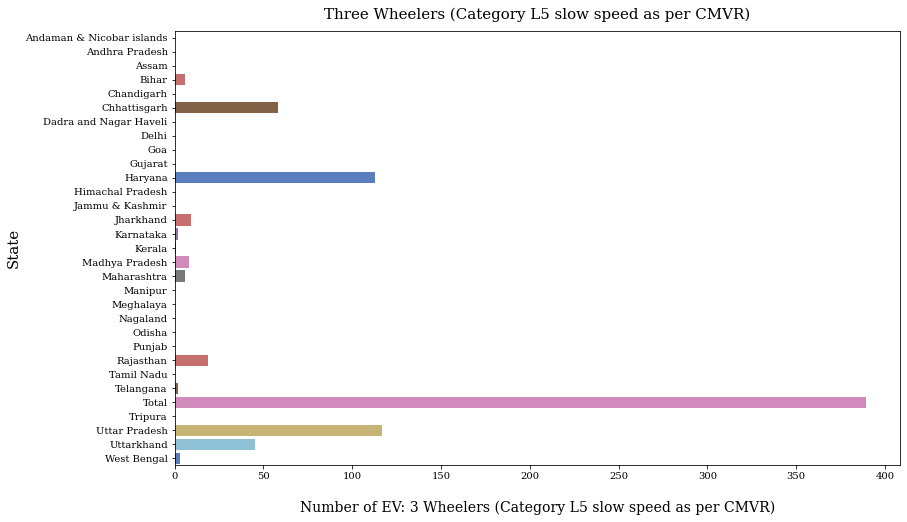

In [17]:
plt.figure(figsize=(13, 8))
sns.barplot(data=df1, y=df1['State'].sort_values(ascending=True), x='Three Wheelers (Category L5 slow speed as per CMVR)', palette='muted')  # Change the palette color here
plt.ylabel('State', fontsize=15, family='serif')
plt.xlabel('Number of EV: 3 Wheelers (Category L5 slow speed as per CMVR)', family='serif', fontsize=14, labelpad=19)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title(label='Three Wheelers (Category L5 slow speed as per CMVR)', weight=200, family='serif', size=15, pad=12)
plt.show()

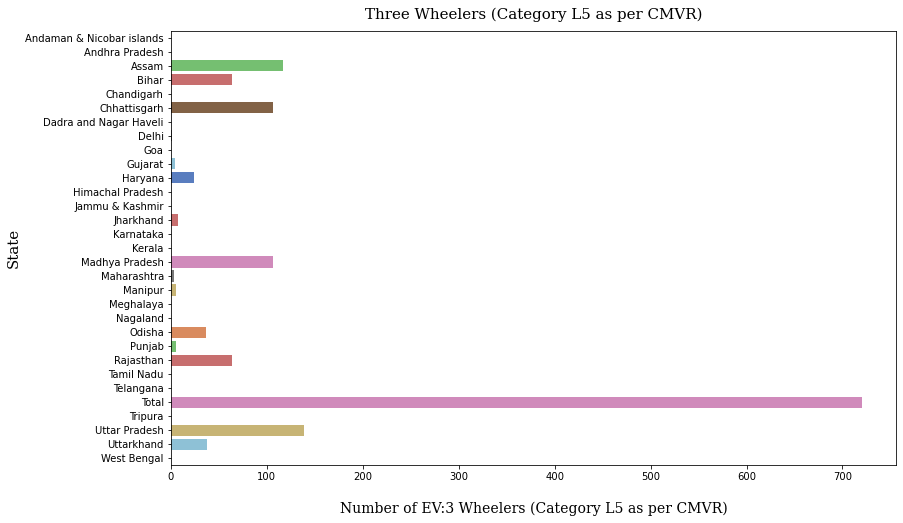

In [18]:
#Three Wheelers (Category L5 as per CMVR)
plt.figure(figsize=(13, 8))
sns.barplot(data=df1, y=df1['State'].sort_values(ascending=True), x='Three Wheelers (Category L5 as per CMVR)', palette='muted')  # Change the palette color here
plt.ylabel('State', fontsize=15, family='serif')
plt.xlabel('Number of EV:3 Wheelers (Category L5 as per CMVR)', family='serif', fontsize=14, labelpad=19)
plt.xticks()
plt.yticks()
plt.title(label='Three Wheelers (Category L5 as per CMVR)', weight=200, family='serif', size=15, pad=12)
plt.show()


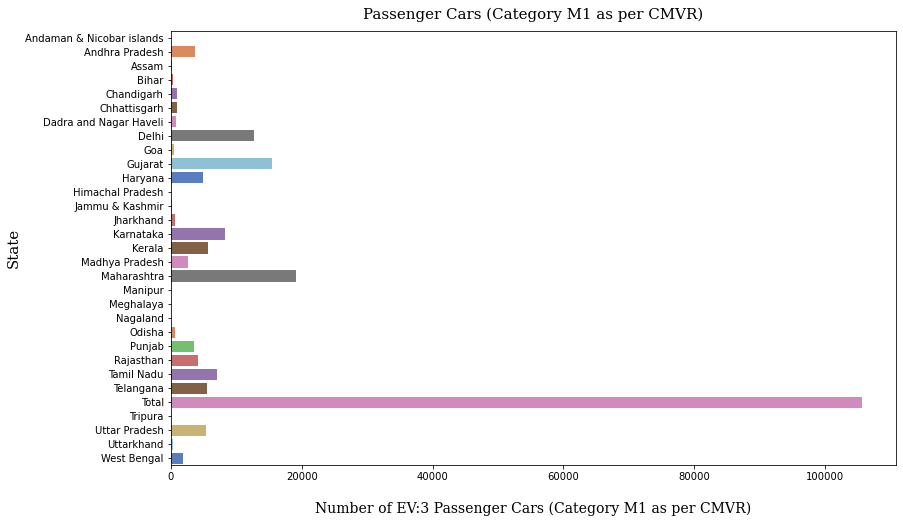

In [19]:
#Passenger Cars (Category M1 as per CMVR)
plt.figure(figsize=(13, 8))
sns.barplot(data=df1, y=df1['State'].sort_values(ascending=True), x='Passenger Cars (Category M1 as per CMVR)', palette='muted')  # Change the palette color here
plt.ylabel('State', fontsize=15, family='serif')
plt.xlabel('Number of EV:3 Passenger Cars (Category M1 as per CMVR)', family='serif', fontsize=14, labelpad=19)
plt.xticks()
plt.yticks()
plt.title(label='Passenger Cars (Category M1 as per CMVR)', weight=200, family='serif', size=15, pad=12)
plt.show()


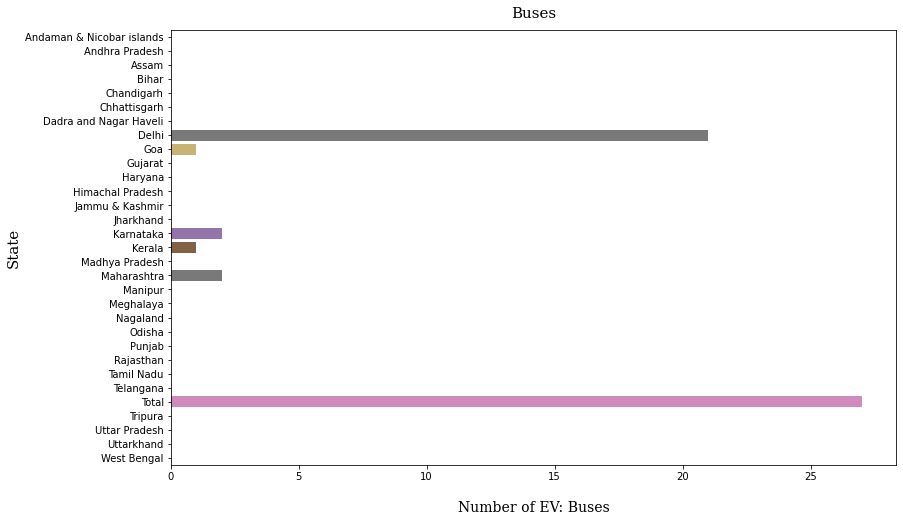

In [20]:
#Passenger Cars (Category M1 as per CMVR)
plt.figure(figsize=(13, 8))
sns.barplot(data=df1, y=df1['State'].sort_values(ascending=True), x='Buses', palette='muted')  # Change the palette color here
plt.ylabel('State', fontsize=15, family='serif')
plt.xlabel('Number of EV: Buses', family='serif', fontsize=14, labelpad=19)
plt.xticks()
plt.yticks()
plt.title(label='Buses', weight=200, family='serif', size=15, pad=12)
plt.show()


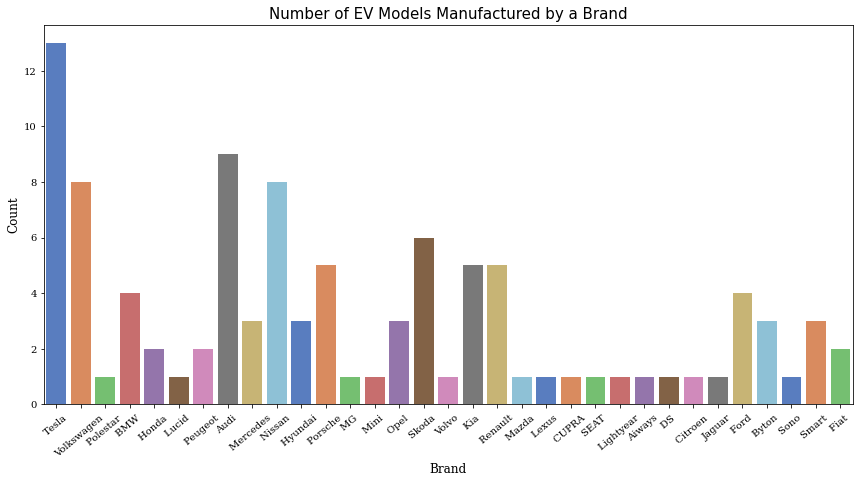

In [21]:
# brand-wise count of EV models
sns.catplot(data=df2, x='Brand', kind='count', palette='muted', height=6, aspect=2)
sns.despine(right=False, top=False)
plt.tick_params(axis='x', rotation=40)
plt.xlabel('Brand',family='serif', size=12)
plt.ylabel('Count', family='serif', size=12)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title('Number of EV Models Manufactured by a Brand', size=15)
plt.show()

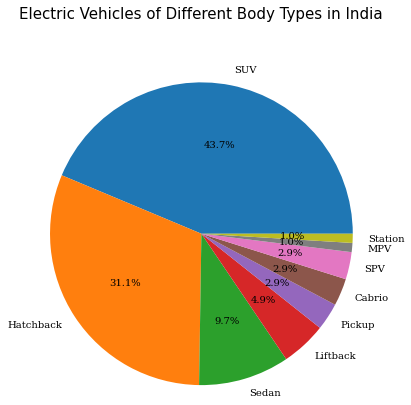

In [22]:
x = df2['BodyStyle'].value_counts()
labels = x.index
sizes = x.values

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, startangle=0, autopct='%1.1f%%', textprops={'family': 'serif'})
plt.title('Electric Vehicles of Different Body Types in India', size=15, pad=50)
plt.axis('equal')
plt.show()

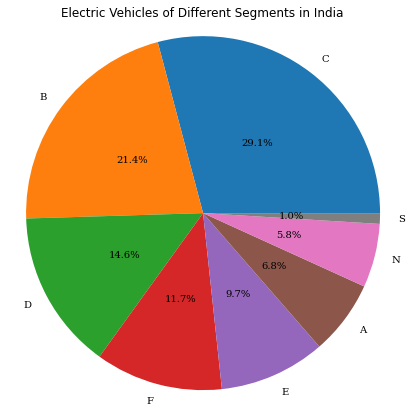

In [23]:
x = df2['Segment'].value_counts()
labels = x.index
sizes = x.values

plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, startangle=0, autopct='%1.1f%%', textprops={'family': 'serif'}, pctdistance=0.5)
plt.title('Electric Vehicles of Different Segments in India')
plt.axis('equal')
plt.show()

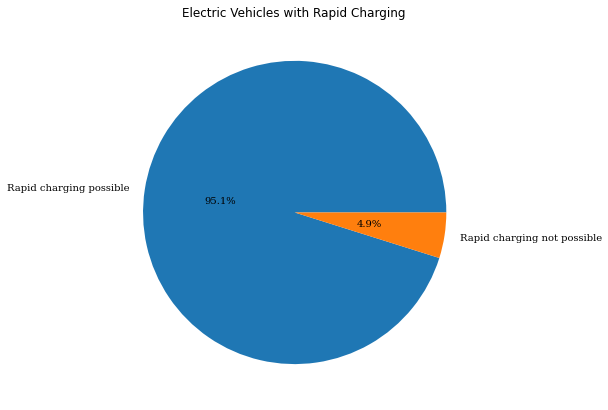

In [24]:
x = df2['RapidCharge'].value_counts()
labels = x.index
sizes = x.values

plt.figure(figsize=(6, 7))
plt.pie(sizes, labels=labels, startangle=0, autopct='%1.1f%%', textprops={'family': 'serif'}, pctdistance=0.5)
plt.title('Electric Vehicles with Rapid Charging')
plt.axis('equal')
plt.show()

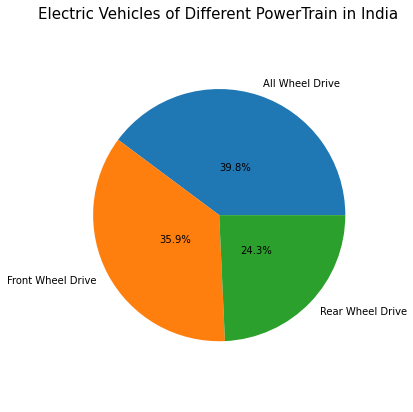

In [25]:
x = df2['PowerTrain'].value_counts()
labels = x.index
sizes = x.values

plt.figure(figsize=(5, 7))
plt.pie(sizes, labels=labels, startangle=0,autopct='%1.1f%%', pctdistance=0.4)
plt.title('Electric Vehicles of Different PowerTrain in India',size=15)
plt.axis('equal')
plt.show()

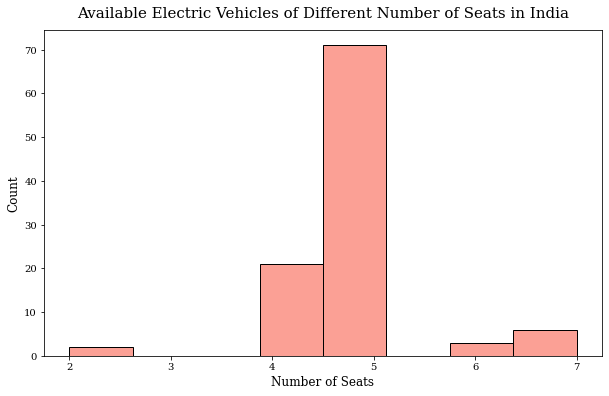

In [26]:
# EVs of different number of seats from dataset 3
plt.figure(figsize=(10, 6)) 
sns.histplot(data=df2, x='Seats', color='salmon')
plt.xlabel('Number of Seats', family='serif', size=12)
plt.ylabel('Count', family='serif', size=12)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title(label='Available Electric Vehicles of Different Number of Seats in India', family='serif', size=15, pad=12)
plt.show()

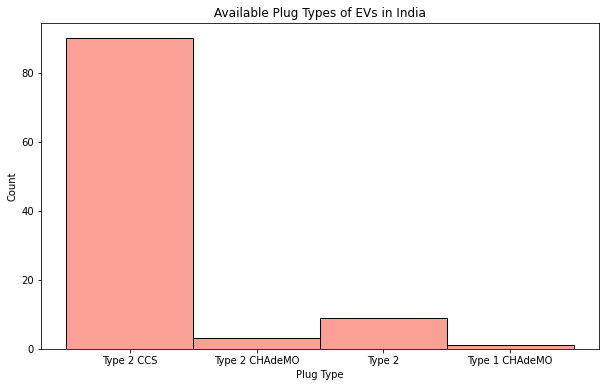

In [27]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df2, x='PlugType',color='salmon')
plt.ylabel('Count')
plt.xlabel('Plug Type')
plt.title('Available Plug Types of EVs in India')
plt.show()

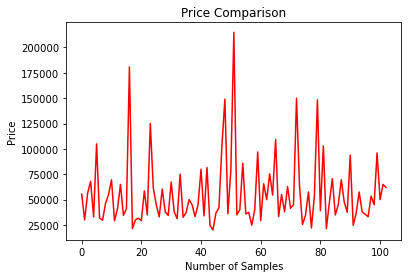

In [28]:
# plotting the price from dataset 3
plt.plot(df2['PriceEuro'], color='red')
plt.xlabel('Number of Samples')
plt.ylabel('Price')
plt.title('Price Comparison');

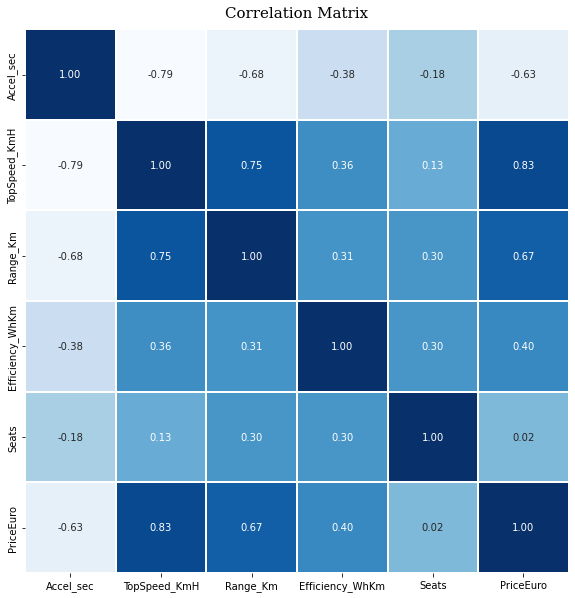

In [29]:
# plotting the correlation matrix from dataset 3
plt.figure(figsize=(10,10))
sns.heatmap(data=df2.corr(), annot=True, cmap='Blues', cbar=False, square=True, fmt='.2f', linewidths=.3)
plt.title('Correlation Matrix', family='serif', size=15, pad=12);

# Model Building Using K-means clustering

In [30]:
# encoding the categorical features

# PowerTrain feature
df2['PowerTrain'].replace(to_replace=['Rear Wheel Drive','Front Wheel Drive','All Wheel Drive'],value=[0, 1, 2],inplace=True)

# RapidCharge feature
df2['FastCharge_KmH'].replace(to_replace=['-'],value=[0],inplace=True)

     

In [31]:
df2['RapidCharge'].replace(to_replace=['Rapid charging not possible','Rapid charging possible'],value=[0, 1],inplace=True)


In [32]:
# selecting features for building a model
X = df2[['Accel_sec','TopSpeed_KmH','Efficiency_WhKm','FastCharge_KmH', 'Range_Km', 'RapidCharge', 'Seats', 'PriceEuro','PowerTrain']]

In [33]:
# feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [34]:
# applying Principle Component Analysis (PCA)
pca = PCA(n_components=9)
X_pca = pca.fit_transform(X_scaled)
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8','PC9'])
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,2.327343,0.251058,-1.285910,-0.589550,0.741695,-1.336093,0.333731,-0.793532,-0.359102
1,-1.917169,-0.570523,-0.703815,0.599540,0.204536,0.345406,-0.399780,0.248018,-0.324925
2,1.528789,0.025753,-0.380455,-0.682523,0.108181,-0.727058,0.280288,0.031797,-0.086851
3,0.259288,-0.100156,-0.252992,1.609250,-0.149788,0.178422,-0.433796,-0.289689,0.186040
4,-2.566457,0.257976,-0.791391,0.322834,-0.899487,0.341113,-0.502423,0.126064,-0.165389


C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


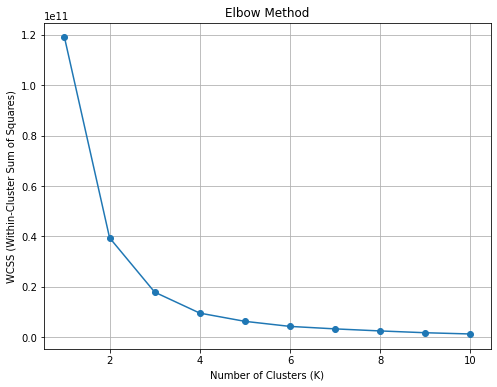

In [41]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

wcss = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=90)
    kmeans.fit(X)  
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(k_values, wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.grid(True)
plt.show()



In [42]:
# training the model using k=4 as rendered by the above plot
kmean = KMeans(n_clusters=4, init='k-means++', random_state=90)
kmean.fit(X_pca)

KMeans(n_clusters=4, random_state=90)

In [43]:
# check the labels assigned to each data point
print(kmean.labels_)

[3 0 1 0 0 3 0 0 0 1 1 0 0 0 0 0 3 0 0 0 0 1 0 3 3 0 0 1 0 0 1 0 0 1 0 0 0
 0 0 1 3 0 1 0 0 0 0 3 3 0 1 3 0 0 1 0 0 2 0 3 0 1 0 1 0 3 0 1 2 1 0 1 3 1
 0 0 1 2 1 3 0 1 2 0 1 0 1 1 1 0 1 2 0 1 0 0 0 0 0 1 1 1 1]


In [44]:
# check the size of clusters
pd.Series(kmean.labels_).value_counts()

0    55
1    30
3    13
2     5
dtype: int64

In [45]:
# adding a new feature of cluster labels to the dataset 2
df2['clusters'] = kmean.labels_

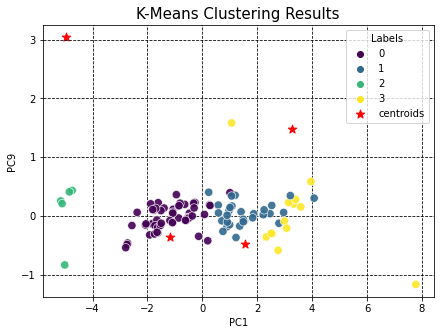

In [46]:
# visualizing clusters
plt.figure(figsize=(7,5))
sns.scatterplot(data=df_pca, x='PC1', y='PC9', s=70, hue=kmean.labels_, palette='viridis', zorder=2, alpha=.9)
plt.scatter(x=kmean.cluster_centers_[:,0], y=kmean.cluster_centers_[:,1], marker="*", c="r", s=80, label="centroids")
plt.xlabel('PC1')
plt.ylabel('PC9')
plt.xticks()
plt.yticks()
plt.grid()
plt.tick_params(grid_color='black', grid_linestyle='--', zorder=1)
plt.legend(title='Labels')
plt.title('K-Means Clustering Results',size=15)
plt.show()